# Question 1: XOR Gate *Implementation*

## Truth table for XOR Gate.

In [1]:
# Q1. XOR gate Classification

import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

def initialize_weights(input_size):
    return np.zeros(input_size + 1)  # +1 is for bias

def activation(summation):
    return 1 if summation >= 0 else 0

def predict(inputs, weights):
    summation = np.dot(inputs, weights[1:]) + weights[0]  # Weights[0] is bias
    return activation(summation)

def train(X, y, weights, learning_rate=0.1, epochs=100):
    for _ in range(epochs):
        for inputs, label in zip(X, y):
            prediction = predict(inputs, weights)
            error = label - prediction
            weights[1:] += learning_rate * error * inputs
            weights[0] += learning_rate * error
    return weights

weights = initialize_weights(input_size=2)

weights = train(X, y, weights, learning_rate=0.1, epochs=100)

print("SLP Predictions for XOR gate:")
for inputs in X:
    print(f"Input: {inputs} -> Output: {predict(inputs, weights)}")


SLP Predictions for XOR gate:
Input: [0 0] -> Output: 1
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 0


## MCP (McCulloch Pitts) Neuron.


Updated MLP Predictions for XOR gate:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 0


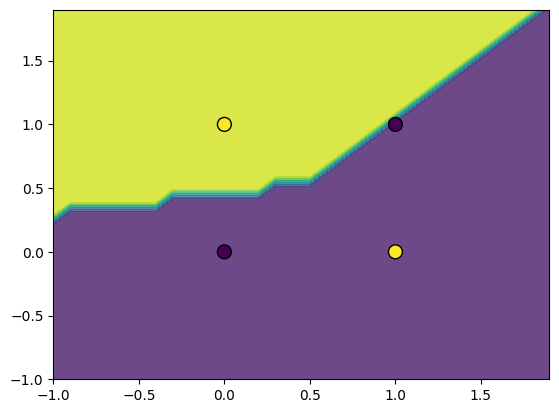

In [2]:
# Multi-Layer Perceptron (MLP) for XOR

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=10000, learning_rate_init=0.01)

mlp.fit(X, y)

mlp_predictions = mlp.predict(X)

print("\nUpdated MLP Predictions for XOR gate:")
for inputs, prediction in zip(X, mlp_predictions):
    print(f"Input: {inputs} -> Output: {prediction}")


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.show()

# Question 2 A. Sentiment Analysis Twitter Airline

In [ ]:
import pandas as pd

df = pd.read_csv('Tweets.csv')
df = df[['text', 'airline_sentiment']]

# Preprocessing - Label encoding: positive as 1 and negative as 0
df['label'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])

X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)  # Set max length of tweet to 100 words
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_shape=(100,), activation=activation))  # First hidden layer
    model.add(Dense(8, activation=activation))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Create the model with desired activation function
model = create_model(activation='relu')

# Train the model with backpropagation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
366/366 [==============================] - 2s 2ms/step - loss: 3.0648 - accuracy: 0.7936 - val_loss: 0.7000 - val_accuracy: 0.8408
Epoch 2/10
366/366 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.8367 - val_loss: 0.5131 - val_accuracy: 0.8419
Epoch 3/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.8367 - val_loss: 0.5053 - val_accuracy: 0.8432
Epoch 4/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.8368 - val_loss: 0.4884 - val_accuracy: 0.8432
Epoch 5/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4534 - accuracy: 0.8372 - val_loss: 0.4879 - val_accuracy: 0.8432
Epoch 6/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8373 - val_loss: 0.4689 - val_accuracy: 0.8432
Epoch 7/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8374 - val_loss: 0.4586 - val_accuracy: 0.8432
Epoch 

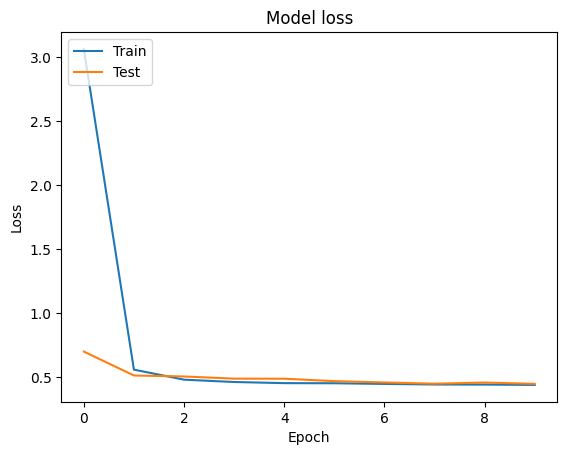

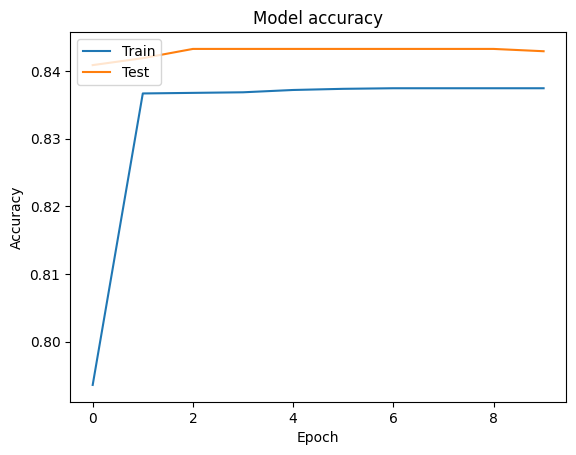

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Try sigmoid activation
model_sigmoid = create_model(activation='sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Try tanh activation
model_tanh = create_model(activation='tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
366/366 [==============================] - 1s 2ms/step - loss: 0.7292 - accuracy: 0.5633 - val_loss: 0.4953 - val_accuracy: 0.8432
Epoch 2/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.8374 - val_loss: 0.4453 - val_accuracy: 0.8432
Epoch 3/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8374 - val_loss: 0.4346 - val_accuracy: 0.8432
Epoch 4/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.8374 - val_loss: 0.4290 - val_accuracy: 0.8432
Epoch 5/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8374 - val_loss: 0.4243 - val_accuracy: 0.8432
Epoch 6/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.8374 - val_loss: 0.4193 - val_accuracy: 0.8432
Epoch 7/10
366/366 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8374 - val_loss: 0.4155 - val_accuracy: 0.8432
Epoch 

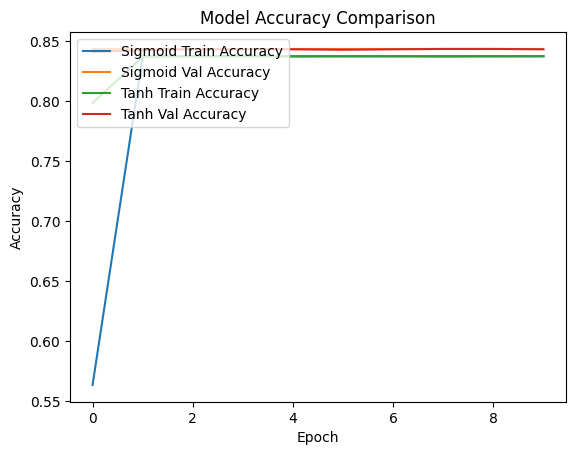

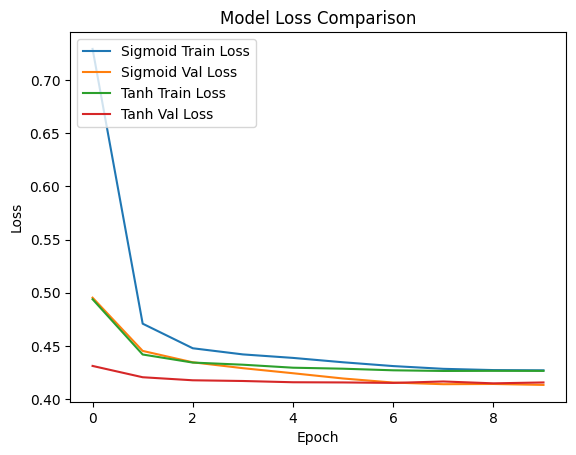

In [ ]:
# Plot sigmoid model loss and accuracy
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Val Accuracy')
plt.plot(history_tanh.history['accuracy'], label='Tanh Train Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Similarly, for loss
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Val Loss')
plt.plot(history_tanh.history['loss'], label='Tanh Train Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh Val Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


92/92 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8429
Test Accuracy: 0.8429
